In [ ]:
# debug - preprocess.py
# import librosa
# import os
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# import numpy as np

# DATA_PATH = "./data/"


# # Input: Folder Path
# # Output: Tuple (Label, Indices of the labels, one-hot encoded labels)
# def get_labels(path=DATA_PATH):
#     labels = os.listdir(path)
#     label_indices = np.arange(0, len(labels))
#     return labels, label_indices, to_categorical(label_indices)

# labels, indices, _ = get_labels(DATA_PATH)
# labels[1:]

In [ ]:
# Keras                          2.4.3
# tensorflow-gpu                 2.6.0

In [26]:
!pip list

Package                        Version


------------------------------ ------------
absl-py                        0.13.0
aiohttp                        3.7.4.post0
appdirs                        1.4.4
argon2-cffi                    21.1.0
astunparse                     1.6.3
async-timeout                  3.0.1
attrs                          21.2.0
audioread                      2.1.9
azure-ai-textanalytics         5.1.0
azure-cognitiveservices-speech 1.19.0
azure-common                   1.1.27
azure-core                     1.19.0
backcall                       0.2.0
bleach                         4.1.0
cachetools                     4.2.2
certifi                        2021.5.30
cffi                           1.14.6
chardet                        4.0.0
charset-normalizer             2.0.4
clang                          5.0
click                          8.0.3
colorama                       0.4.4
comtypes                       1.1.10
cycler                         0.10.0
debugpy                        1.4.1
decorator    

In [1]:
from preprocess import * # 匯入 .py 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
X_train, X_test, y_train, y_test = get_train_test() #該方法來自preprocess.py
X_train = X_train.reshape(X_train.shape[0], 20, 11, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 11, 1)

cat.npy
down.npy
go.npy
happy.npy
left.npy
off.npy
on.npy
right.npy


In [7]:
X_train[0].shape

(20, 11, 1)

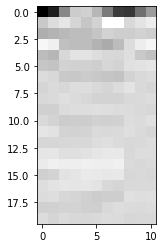

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(20, 11), cmap='gray')
plt.show()

In [3]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(X_train.shape)

(11617, 20, 11, 1)


In [16]:
y_train_hot[:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 11, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 10, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               184448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [17]:
model.fit(X_train, y_train_hot, 
          batch_size=100, 
          epochs=100, 
          verbose=1, 
          validation_data=(X_test, y_test_hot))

Epoch 1/10
117/117 [==============================] - 59s 51ms/step - loss: 30.4050 - accuracy: 0.1104 - val_loss: 20.0485 - val_accuracy: 0.1044
Epoch 2/10
117/117 [==============================] - 4s 35ms/step - loss: 28.4760 - accuracy: 0.1128 - val_loss: 18.1641 - val_accuracy: 0.1026
Epoch 3/10
117/117 [==============================] - 3s 27ms/step - loss: 27.3425 - accuracy: 0.1104 - val_loss: 16.5813 - val_accuracy: 0.1012
Epoch 4/10
117/117 [==============================] - 3s 22ms/step - loss: 26.0755 - accuracy: 0.1110 - val_loss: 15.2658 - val_accuracy: 0.1004
Epoch 5/10
117/117 [==============================] - 3s 22ms/step - loss: 24.9254 - accuracy: 0.1104 - val_loss: 14.1826 - val_accuracy: 0.1010
Epoch 6/10
117/117 [==============================] - 3s 23ms/step - loss: 24.6138 - accuracy: 0.1052 - val_loss: 13.3183 - val_accuracy: 0.1032
Epoch 7/10
117/117 [==============================] - 4s 36ms/step - loss: 23.4958 - accuracy: 0.1119 - val_loss: 12.5888 - val_a

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

X_train.shape

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_train.shape

X_train = X_train.reshape(X_train.shape[0], 20, 11, 1)

X_train.shape

X_test = X_test.reshape(X_test.shape[0], 20, 11, 1)

X_test.shape

In [18]:
score = model.evaluate(X_test, y_test_hot, verbose=1)

243/243 [==============================] - 3s 13ms/step - loss: 11.0685 - accuracy: 0.1103


In [19]:
score

[11.068521499633789, 0.11025045067071915]

In [20]:
mfcc = wav2mfcc('./down.wav')

In [21]:
mfcc_reshaped = mfcc.reshape(1, 20, 11, 1)

In [22]:
mfcc_reshaped.shape

(1, 20, 11, 1)

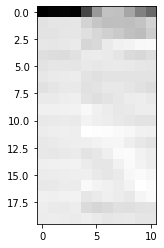

In [23]:
import matplotlib.pyplot as plt
plt.imshow(mfcc_reshaped[0].reshape(20, 11), cmap='gray')
plt.show()

In [24]:
np.argmax(model.predict(mfcc_reshaped))

0

In [25]:
get_labels()

(['bed.npy',
  'cat.npy',
  'down.npy',
  'go.npy',
  'happy.npy',
  'left.npy',
  'off.npy',
  'on.npy',
  'right.npy'],
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))